In [40]:
import pandas as pd
import numpy as np
import requests
pd.set_option('display.max_columns', 35)
from datetime import timedelta, datetime
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [27]:
df = pd.read_csv('climate_data_auston.csv')

In [28]:
df.shape

(4718, 34)

In [30]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
4713,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-27,NaN,NaN,NaN,NaN,0.55,",,7,0730",0.0,",,7",0.0,",,7",58.0,",,7",39.0,",,7",42.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-28,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",60.0,",,7",40.0,",,7",40.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4715,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-29,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",67.0,",,7",34.0,",,7",34.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#check for null values
df.isnull().sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
DAPR               4710
DAPR_ATTRIBUTES    4710
MDPR               4709
MDPR_ATTRIBUTES    4709
PRCP                105
PRCP_ATTRIBUTES     105
SNOW               1151
SNOW_ATTRIBUTES    1151
SNWD               1151
SNWD_ATTRIBUTES    1151
TMAX                 58
TMAX_ATTRIBUTES      58
TMIN                 54
TMIN_ATTRIBUTES      54
TOBS                 66
TOBS_ATTRIBUTES      66
WT01               4600
WT01_ATTRIBUTES    4600
WT03               4498
WT03_ATTRIBUTES    4498
WT04               4715
WT04_ATTRIBUTES    4715
WT05               4715
WT05_ATTRIBUTES    4715
WT06               4717
WT06_ATTRIBUTES    4717
WT11               4699
WT11_ATTRIBUTES    4699
dtype: int64

In [35]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [38]:
df = df.set_index('DATE')

In [39]:
df.head(2)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02-01,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,",0.0,"P,,0",NaN,NaN,60.0,",,0",36.0,",,0",50.0,",,0,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-02,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,0700",0.0,"P,,0",0.0,"P,,0",62.0,",,0",39.0,",,0",41.0,",,0,0700",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
by_date = df.reset_index()


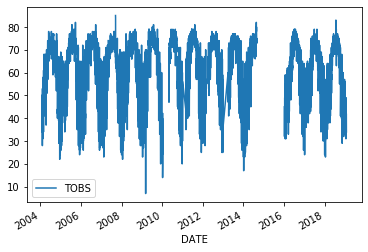

In [43]:
by_date.plot(x = 'DATE', y = 'TOBS' )

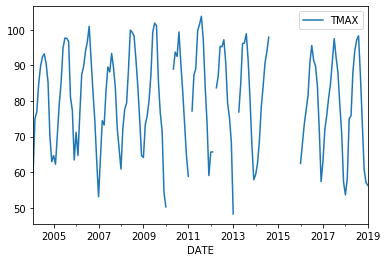

In [51]:
df.resample('M').mean().reset_index().plot(x = 'DATE', y = "TMAX")